In [2]:
import os
from matlab_gym.mat_gym_mmap import MatlabGymMmapWrapper 
from stable_baselines3.common.vec_env import VecNormalize
from stable_baselines3.common.env_util import make_vec_env
from functools import partial
from gym import register
from seagul.zoo3_utils import ALGOS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import savemat
import pickle

env_script = "make_1dof_env"
exp_path = f"/home/sgillen/work/n_link_arm/stable/sb3_data/{env_script}"

env_partial = partial(MatlabGymMmapWrapper, "/home/sgillen/work/n_link_arm/", env_script)

try:
    register("bball_1dof-v0", entry_point = env_partial)
except:
    pass

model_dict = {}
norm_dict = {}
df_dict = {}

for algo_dir in os.scandir(exp_path):
    algo_name = algo_dir.path.split("/")[-1]
    ALGO = ALGOS[algo_name]
    
    if not algo_name in model_dict:
        model_dict[algo_name] = []
    if not algo_name in df_dict:
        df_dict[algo_name] = []
    if not algo_name in norm_dict:
        norm_dict[algo_name] = []
    
    for seed_dir in os.scandir(algo_dir.path):   
        seed =  seed_dir.path.split("/")[-1]
        df_dict[algo_name].append(pd.read_csv(f"{seed_dir.path}/0.monitor.csv", skiprows=1))
        model_dict[algo_name].append(ALGO.load(f"{seed_dir.path}/model.pkl", mapped_devic='cpu'))
    
        norm = pickle.load(open(f"{seed_dir.path}/vecnormalize.pkl", 'rb'))
        norm_dict[algo_name].append(norm)
        
        #env = make_vec_env('bball_1dof-v0', n_envs = 1)
        #env = VecNormalize.load(f"{seed_dir.path}/vecnormalize.pkl", env)
        #env.training = False
        #env.norm_reward = False
        #env_dict[algo_name].append(env)

-53.071107
-172.525336
-53.071107
-53.071107
-40.533241
-53.071107
-16.290248
-28.929948


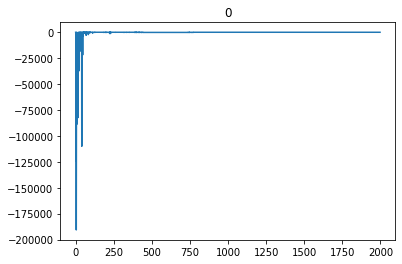

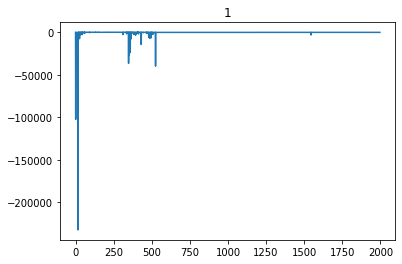

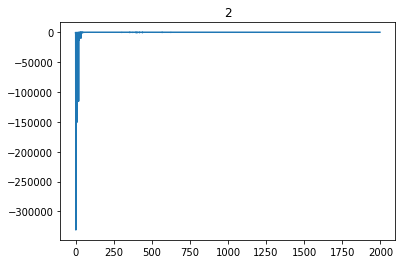

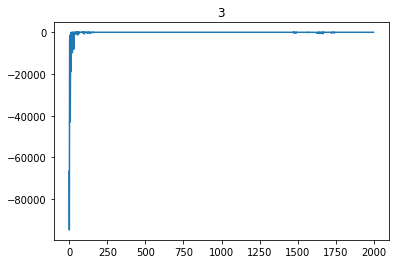

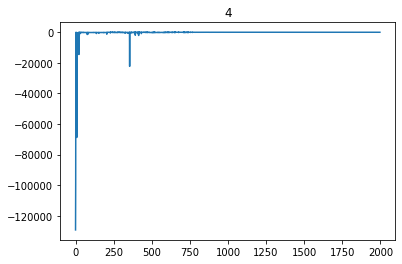

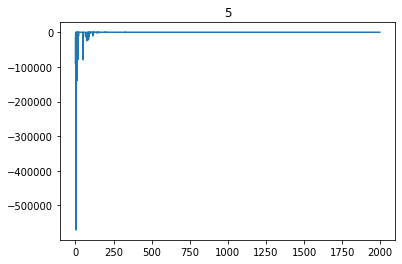

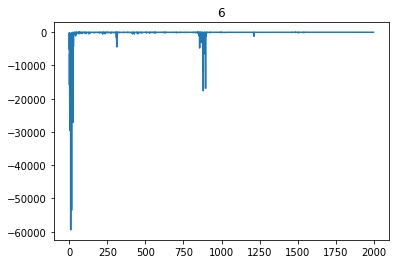

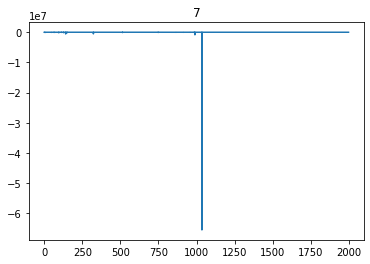

<Figure size 432x288 with 0 Axes>

In [2]:
algo = 'ppo'

for i, df in enumerate(df_dict[algo]):
    df['r'].plot()
    plt.title(i)
    plt.figure()
    print(np.array(df['r'])[-1])

model_idx = -1
model = model_dict[algo][model_idx]
env = env_dict[algo][model_idx]

In [ ]:
model_idx = 3
model = model_dict[algo][model_idx]
env = env_dict[algo][model_idx]
obs = env.reset()

model.seed = 6
env.seed(6)


done = False
obs_list = []
act_list = []
rew_list = []
while not done:
    obs_list.append(env.unnormalize_obs(obs))

    act,_ = model.predict(obs)
    act_list.append(act)
    
    obs,rew,done,_ = env.step(act)
    rew_list.append(rew)
    
    

In [ ]:
for i, state in enumerate(['paddle', 'ball', 'd_paddle', 'd_ball']):
    plt.plot(np.array(obs_list).squeeze()[:,i])
    plt.grid()
    plt.title(state)
    plt.figure()
    
print(sum(rew_list))

plt.plot(np.array(act_list).squeeze())
plt.title("action")

In [8]:
savemat("weird.mat", {"a" : np.array(act_list).squeeze()})

[-34.00982]


Text(0.5, 1.0, 'action')

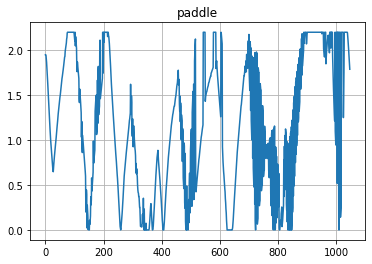

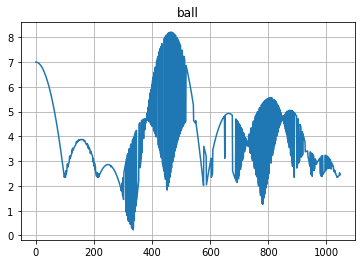

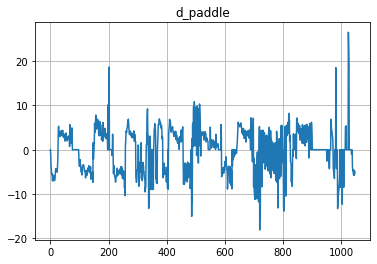

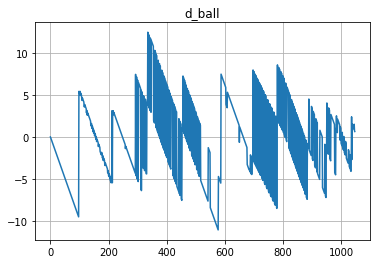

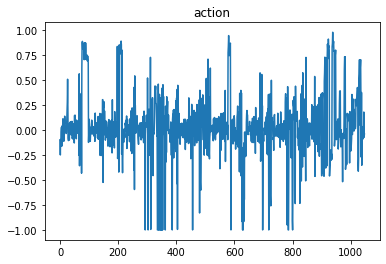

In [5]:
for i, state in enumerate(['paddle', 'ball', 'd_paddle', 'd_ball']):
    plt.plot(np.array(obs_list).squeeze()[:,i])
    plt.grid()
    plt.title(state)
    plt.figure()
    
print(sum(rew_list))

plt.plot(np.array(act_list).squeeze())
plt.title("action")

In [6]:
states = np.array(obs_list).squeeze()

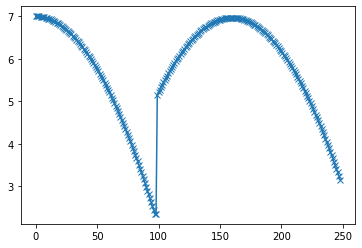

In [8]:
plt.plot(states[1:250,1], 'x-')

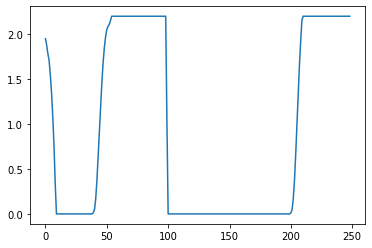

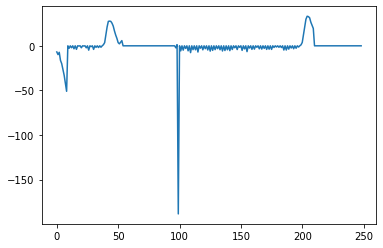

In [10]:
plt.plot(states[1:250,0])
plt.figure()
plt.plot(states[1:250,2])

In [62]:
states[400:600,1]

array([33.20604288, 33.27800786, 33.34899569, 17.58612444, 33.48802973,
       17.61678691, 33.62314625, 33.6892318 , 33.75433765, 33.81846634,
       33.88161408, 33.94377957, 17.69323152, 17.70023154, 17.70625298,
       34.18264715, 34.23991798, 34.29620404, 34.35150913, 34.40583834,
       17.721798  , 34.51155132, 34.56293891, 17.71633916, 17.71256063,
       34.71121968, 34.75868595, 17.69534307, 17.68764307, 34.89521039,
       17.66930588, 17.65866663, 35.02291122, 35.06351836, 35.10314579,
       35.14179227, 35.17945905, 35.21614486, 35.25185352, 35.28657867,
       35.32032794, 17.498373  , 35.38488359, 35.41568742, 35.4455141 ,
       35.4743649 , 35.50223219, 35.52911724, 35.5550226 , 17.29957967,
       17.27032082, 35.6268656 , 35.64885345, 35.66986034, 17.1434823 ,
       35.70893503, 35.72700157, 35.74409095, 17.00096502, 35.77532173,
       35.78947076, 35.80263882, 35.81482718, 35.82603077, 35.83625848,
       35.84550522, 16.66889176, 35.86106089, 35.86736727, 16.52

In [63]:
33.34899569-17.58612444

15.762871250000003

In [64]:
33.94377957 - 17.69323152

16.250548049999995

In [10]:
np.array(np.array(act_list).squeeze(), dtype=np.float64)

array([-0.09712694, -0.24836846, -0.09401729, ...,  0.93657887,
        1.        ,  1.        ])

In [14]:
env.venv.envs[0].unwrapped.act_dtype

numpy.float64